# Capstone Project - Car Accident Severity (Week 2)
### IBM Data Science Capstone by IBM/Coursera

### Submitted By: Priyesh Saini

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In the last two decades, most of the countries have witnessed a steep rise in road accidents. The two crucial factors that are responsible for it are population growth and large immigration to urban cities. In this project, we are going to take the case of the City of Seattle. 

**Seattle**, a seaport city on the west coast of the US, is home to around 8 lac people. Washington State’s largest city is also an address of some of the largest Tech Industries with Microsoft and Amazon headquartered in its metropolitan area. Residents of this city get around by various means of transportation such as a car, trolley, streetcar, public buses, bicycle, on foot and by the rail. With such busy streets, it is of no surprise that the city is witnessing road accidents every-day.**Washington State Department of Transportation (WSDOT)**, there were a total of **10,315** cases of crashes in Seattle alone. Out of which, **22** were fatal, **190** were serious injury collisions and **834** were minor injury collisions.
From the above stats, it is evident that the city needs some strict measures to counteract the current situation. **Predicting the severity** of crashes is a crucial constituent of reducing the consequences of accidents. This project is a major step to do the same.


## Data <a name="data"></a>

I am using the dataset provided by the Seattle Police Department (SPD) and recorded by the Seattle Department of Transportation (SDOT)(made available to me by Coursera). It contains all the collision records and was updated weekly. This dataset contains a total of 1,94,673 records and 37 attributes. To get detailed the detailed information and the metadata of this dataset, you can contact SDOT Traffic Management Division, Traffic Records Group.

Now lets get started. Lets import all the libraries that we are going to use.

In [1]:
# Importing all required Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling 
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



Dataset is in CSV fromat. To work on this project we need to load the dataset in pandas dataframe.

In [2]:
# Loading CSV file in Pandas Dataframe
df=pd.read_csv("Data Collisions.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Lets have a look at our dataframe.

In [3]:
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

To get an idea of what is the kind of the data that we are dealing with, lets check the datatypes of all the attributes in the dataframe.

In [4]:
# Checking Datatypes of attributes
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
# Checking Attributes
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Missing Values are always a problem for modelling the accurate model. It is of paramount importance to deal with them. If not handled properly, it can create a bias in the model. To get a rough estimate of how much data we are missing in each attribute, use the following command.

In [6]:
# Checking for number of missing values in the dataframe
df.isnull().sum().to_frame()

0
SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE          1926
INTKEY          129603
LOCATION          2677
EXCEPTRSNCODE   109862
EXCEPTRSNDESC   189035
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
SDOT_COLDESC         0
INATTENTIONIND  164868
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT   190006
SDOTCOLNUM       79737
SPEEDING        185340
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0

We got lot of work to do beacause clearly we are missing a lot of data. We will visualize the data later to get the better understanding of what we have but for now, lets analyze some features.

In [7]:
df.ROADCOND.value_counts().to_frame()

ROADCOND
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64

In [8]:
df.ROADCOND.isnull().sum()

5012

In [9]:
df.LIGHTCOND.value_counts().to_frame()

LIGHTCOND
Daylight                     116137
Dark - Street Lights On       48507
Unknown                       13473
Dusk                           5902
Dawn                           2502
Dark - No Street Lights        1537
Dark - Street Lights Off       1199
Other                           235
Dark - Unknown Lighting          11

In [10]:
df.LIGHTCOND.isnull().sum()

5170

Okay, on further investigation we came to know that there are lot of missing values and they were represented in 2 forms (i.e. NaN values, string values with ‘Unknown’ Label). Example: ROADCOND attribute has 5012 missing values (NaN Type), but it also has 15078 values with ‘Unknown’ label. Same is the case with whole dataset.So, the first step we will take is to convert/replace all the missing values into NaN type so that it will be easy for me while modelling the dataset. 

In [11]:
# Unknown is also basically null values. hence repalce it with NaN
df.replace("Unknown", np.nan, inplace = True)

In [12]:
# Checking attribute values after replacing.
df.LIGHTCOND.value_counts().to_frame()

LIGHTCOND
Daylight                     116137
Dark - Street Lights On       48507
Dusk                           5902
Dawn                           2502
Dark - No Street Lights        1537
Dark - Street Lights Off       1199
Other                           235
Dark - Unknown Lighting          11

In [13]:
df.LIGHTCOND.isnull().sum()

18643

Things are bit better now. let's have a look.

In [14]:
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

After fixing these problems, now it is time for **Dimensionality Reduction**. There are lot of attributes which needs to be removed from data frame like

•	Handling attributes which were giving the same information repeatedly. \
•	Handling attributes which have a significant amount of missing data.

Attribute like ‘LOCATION’ is redundant because this information is already available to us in the form of latitude and longitude. So ‘LOCATION’ needs to be dropped. Same was the case for the following attributes: SEVERITYCODE.1, SEVERITYDESC, PEDCOUNT, PEDCYLCOUNT, INCDATE, JUNCTIONTYPE, EXCEPTRSNDESC, SDOT_COLDESC. Hence i am going to drop all these attributes.


In [15]:
df.drop(['LOCATION','SEVERITYCODE.1','SEVERITYDESC','PEDCOUNT','PEDCYLCOUNT','INCDATE','JUNCTIONTYPE','EXCEPTRSNDESC','SDOT_COLDESC','ST_COLDESC'], axis=1, inplace=True)

In [16]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'EXCEPTRSNCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'VEHCOUNT', 'INCDTTM', 'SDOT_COLCODE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

In [17]:
df.isnull().sum().to_frame()

0
SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE          1926
INTKEY          129603
EXCEPTRSNCODE   109862
COLLISIONTYPE     4904
PERSONCOUNT          0
VEHCOUNT             0
INCDTTM              0
SDOT_COLCODE         0
INATTENTIONIND  164868
UNDERINFL         4884
WEATHER          20172
ROADCOND         20090
LIGHTCOND        18643
PEDROWNOTGRNT   190006
SDOTCOLNUM       79737
SPEEDING        185340
ST_COLCODE          18
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0

Some attributes need renaming to give better idea of what it is..

In [18]:
df.rename(columns = {"X": "LONGITUDE","Y":"LATITUDE"},inplace=True) 
df

SEVERITYCODE   LONGITUDE   LATITUDE  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ...   WEATHER ROADCOND  \
0       3502005  Matched  Intersection  37475.0  ...  Overcast      Wet   
1       2607959  Matched         Block      NaN  ...   Raining      Wet   
2       1482393  Matched         Block      NaN  ...  Overcast      Dry   
3       3503937  Matched         Block      NaN  ...     Clear      Dry   
4       1807429  Matched  Intersection  34387.0  ...   Raining      Wet   
...         ...      ...           ...      ...  ...       ...      ...   
194668  E871089  Matched         Block      NaN  ...     Clear      Dry   
194669  E876731  Matched         Block      NaN  ...   Raining      Wet   
194670  3809984  Matched  Intersection  24760.0  ...     Clear      Dry   
194671  3810083  Matched  Intersection  24349.0  ...     Clear      Dry   
194672  E868008  Matched         Block      NaN  ...     Clear      Wet   

                      LIGHTCOND  PEDROWNOTGRNT SDOTCOLNUM  SPEEDING  \
0                      Daylight            NaN        NaN       NaN   
1       Dark - Street Lights On            NaN  6354039.0       NaN   
2                      Daylight            NaN  4323031.0       NaN   
3                      Daylight            NaN        NaN       NaN   
4                      Daylight            NaN  4028032.0       NaN   
...                         ...            ...        ...       ...   
194668                 Daylight            NaN        NaN       NaN   
194669                 Daylight            NaN        NaN       NaN   
194670                 Daylight            NaN        NaN       NaN   
194671                     Dusk            NaN        NaN       NaN   
194672                 Daylight            NaN        NaN       NaN   

       ST_COLCODE SEGLANEKEY CROSSWALKKEY HITPARKEDCAR  
0              10          0            0            N  
1              11          0            0            N  
2              32          0            0            N  
3              23          0            0            N  
4              10          0            0            N  
...           ...        ...          ...          ...  
194668         24          0            0            N  
194669         13          0            0            N  
194670         28          0            0            N  
194671          5       4308            0            N  
194672         14          0            0            N  

[194673 rows x 28 columns]

Now it's time to visualize the data to get better understanding of missing values.

Total   Percent
PEDROWNOTGRNT   190006  0.976026
SPEEDING        185340  0.952058
INATTENTIONIND  164868  0.846897
INTKEY          129603  0.665747
EXCEPTRSNCODE   109862  0.564341

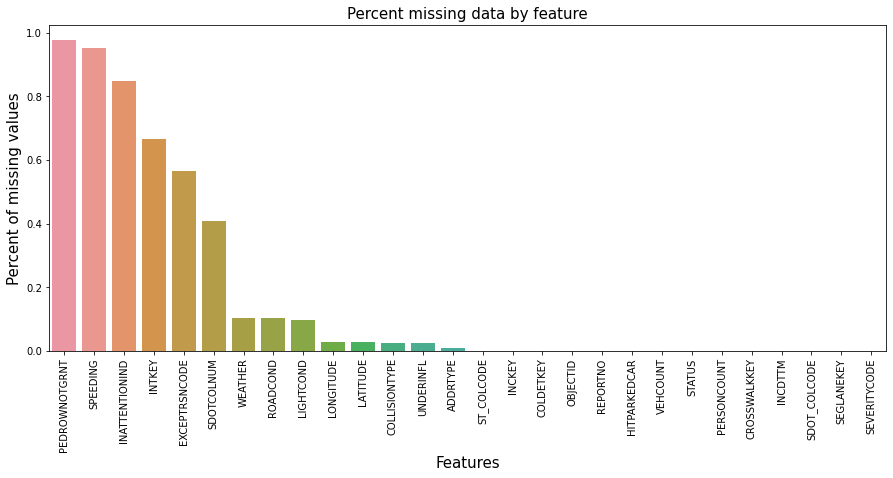

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

If an attribute has a lot of missing data, it can create a bias in the model. In this project, I am neglecting all those attributes where missing value is more than 40%. Following are the attributes that we are going to drop:

•	PEDROWNOTGRNT, missing value: 97.6% \
•	SPEEDING, missing value: 95.2% \
•	INATTENTIONIND, missing value: 84.7% \
•	INTKEY, missing value: 66.5% \
•	EXCEPTRSNCODE, missing value: 56.43% \
•	SDOTCOLNUM, missing value: 43.7%



In [20]:
df.drop(['PEDROWNOTGRNT','SPEEDING','INATTENTIONIND','INTKEY','EXCEPTRSNCODE','SDOTCOLNUM'], axis=1, inplace=True)

In [21]:
df.head()

SEVERITYCODE   LONGITUDE   LATITUDE  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE COLLISIONTYPE  ...                 INCDTTM  \
0  Matched  Intersection        Angles  ...    3/27/2013 2:54:00 PM   
1  Matched         Block     Sideswipe  ...   12/20/2006 6:55:00 PM   
2  Matched         Block    Parked Car  ...  11/18/2004 10:20:00 AM   
3  Matched         Block         Other  ...    3/29/2013 9:26:00 AM   
4  Matched  Intersection        Angles  ...    1/28/2004 8:04:00 AM   

   SDOT_COLCODE UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            11         N  Overcast      Wet                 Daylight   
1            16         0   Raining      Wet  Dark - Street Lights On   
2            14         0  Overcast      Dry                 Daylight   
3            11         N     Clear      Dry                 Daylight   
4            11         0   Raining      Wet                 Daylight   

  ST_COLCODE SEGLANEKEY CROSSWALKKEY  HITPARKEDCAR  
0         10          0            0             N  
1         11          0            0             N  
2         32          0            0             N  
3         23          0            0             N  
4         10          0            0             N  

[5 rows x 22 columns]

In [22]:
df.profile_report()

Now we are left with the attributes that have very less percentage of missing values. It's time to deal with them.

In [23]:
# Checking which attribute has missing value
df.isnull().sum()

SEVERITYCODE         0
LONGITUDE         5334
LATITUDE          5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE          1926
COLLISIONTYPE     4904
PERSONCOUNT          0
VEHCOUNT             0
INCDTTM              0
SDOT_COLCODE         0
UNDERINFL         4884
WEATHER          20172
ROADCOND         20090
LIGHTCOND        18643
ST_COLCODE          18
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

Now LATITUDE & LONGITUDE has 2.7 % missing value. Although I can use imputer to predict the missing values, it is very complicated. These missing values can’t be imputed by simple SK Learn Imputer. This is a geographical data and needs a geography-specific library to predict these missing values. But, the missing values % is very small. Hence, I am dropping those values. Its not worth the effort.

In [24]:
df.dropna(subset=["LATITUDE"], axis=0, inplace=True)
df.dropna(subset=["LONGITUDE"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

SEVERITYCODE         0
LONGITUDE            0
LATITUDE             0
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE             0
COLLISIONTYPE     4757
PERSONCOUNT          0
VEHCOUNT             0
INCDTTM              0
SDOT_COLCODE         0
UNDERINFL         4737
WEATHER          18818
ROADCOND         18697
LIGHTCOND        17444
ST_COLCODE          18
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

There are some attributes which have NO impact on our target variable (i.e. SEVERITYCODE). They are simply post-crash details recorded by the department. These attributes are not responsible to cause any crash and hence are not appropriate in predicting the severity of crashes. Such attributes are:

•	OBJECT_ID \
•	INCKEY \
•	COLDETKEY \
•	REPORTNO \
•	STATUS \
•	SDOT_COLCODE \
•	ST_COLCODE \
•	SEGLANEKEY \
•	CROSSWALKKEY 

Lets drop all of them.


In [25]:
df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','SDOT_COLCODE','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY'], axis=1, inplace=True)

Lets replace the remaining missing values on the basis of frequency of occurance.

In [26]:
df['COLLISIONTYPE'].value_counts()

Parked Car    46381
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64

In [27]:
df.drop(['UNDERINFL'], axis=1, inplace=True)

In [28]:
df.dtypes

SEVERITYCODE       int64
LONGITUDE        float64
LATITUDE         float64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
dtype: object

In [29]:
df['LIGHTCOND'].value_counts()

Daylight                    113582
Dark - Street Lights On      47314
Dusk                          5775
Dawn                          2422
Dark - No Street Lights       1451
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [30]:
df['LIGHTCOND'].isnull().sum()

17444

In [31]:
df['LIGHTCOND'].replace(np.nan, "Daylight", inplace = True)

In [32]:
df['LIGHTCOND'].isnull().sum()

0

In [33]:
df['ROADCOND'].value_counts()

Dry               122076
Wet                46064
Ice                 1177
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

In [34]:
df['ROADCOND'].isnull().sum()

18697

In [35]:
df['ROADCOND'].replace(np.nan, "Dry", inplace = True)

In [36]:
df['ROADCOND'].isnull().sum()

0

In [37]:
df['WEATHER'].value_counts()

Clear                       108959
Raining                      32015
Overcast                     27136
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [38]:
df['WEATHER'].isnull().sum()

18818

In [39]:
df['WEATHER'].replace(np.nan, "Clear", inplace = True)

In [40]:
df['WEATHER'].isnull().sum()

0

In [41]:
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

SEVERITYCODE     0
LONGITUDE        0
LATITUDE         0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
VEHCOUNT         0
INCDTTM          0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

Finally we got rid of all missing values and are ready to train our dataset for modelling. But before that lets analyze the relation between eacn input feature and our target variable.

In [42]:
df.dtypes

SEVERITYCODE       int64
LONGITUDE        float64
LATITUDE         float64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
dtype: object

## Methodology <a name="methodology"></a>

### Finding Relation between each feature and target variable

**Detailed discussion of these plots is discussed in the report.**

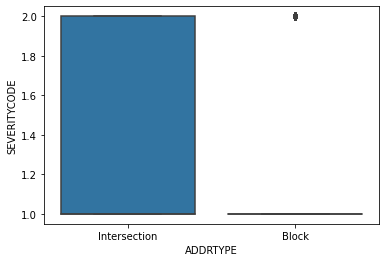

In [43]:
sns.boxplot('ADDRTYPE','SEVERITYCODE',data=df)

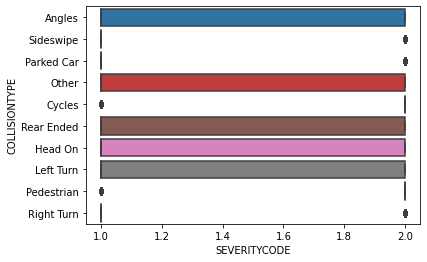

In [44]:
sns.boxplot('SEVERITYCODE','COLLISIONTYPE',data=df)

In [45]:
collision = df.groupby('COLLISIONTYPE', axis=0).sum()
collision.head()

SEVERITYCODE     LONGITUDE      LATITUDE  PERSONCOUNT  VEHCOUNT
COLLISIONTYPE                                                                 
Angles                48033 -4.215507e+06  1.641099e+06        93455     71540
Cycles                10090 -6.578954e+05  2.561449e+05        11444      5259
Head On                2859 -2.442923e+05  9.507742e+04         5450      4251
Left Turn             19006 -1.666626e+06  6.488239e+05        36837     27952
Other                 28073 -2.725141e+06  1.060672e+06        40718     32467

In [46]:
df.corr()

SEVERITYCODE  LONGITUDE  LATITUDE  PERSONCOUNT  VEHCOUNT
SEVERITYCODE      1.000000   0.010375  0.018337     0.127633 -0.085068
LONGITUDE         0.010375   1.000000 -0.160095     0.012787 -0.015710
LATITUDE          0.018337  -0.160095  1.000000    -0.014000  0.020630
PERSONCOUNT       0.127633   0.012787 -0.014000     1.000000  0.395466
VEHCOUNT         -0.085068  -0.015710  0.020630     0.395466  1.000000

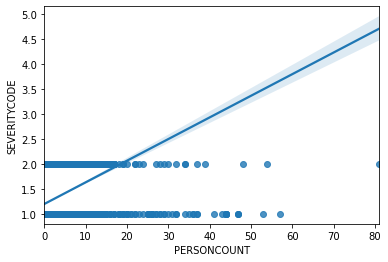

In [47]:
sns.regplot("PERSONCOUNT","SEVERITYCODE",data=df)

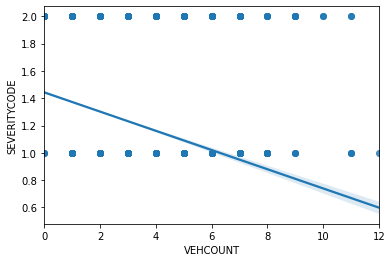

In [48]:
sns.regplot("VEHCOUNT","SEVERITYCODE",data=df)

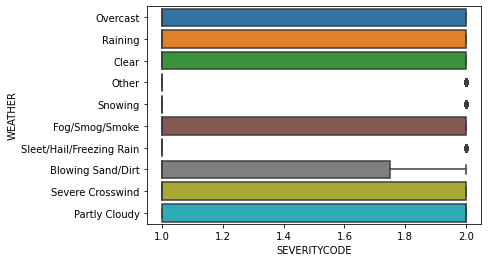

In [49]:
sns.boxplot("SEVERITYCODE",'WEATHER',data=df)

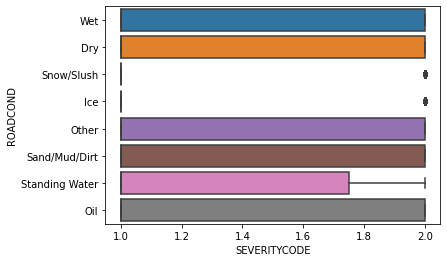

In [50]:
sns.boxplot("SEVERITYCODE",'ROADCOND',data=df)

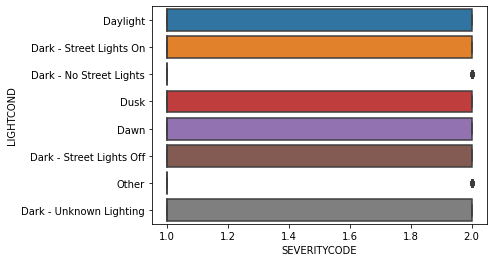

In [51]:
sns.boxplot("SEVERITYCODE",'LIGHTCOND',data=df)

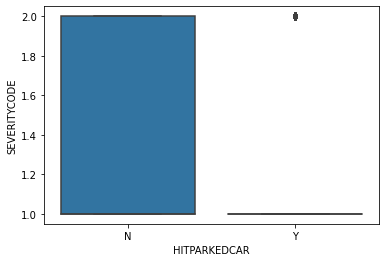

In [52]:
sns.boxplot("HITPARKEDCAR","SEVERITYCODE",data=df)

Lets have a Bird's Eye View of all the spots to find which areas are more prone to accidents in the Seattle City.

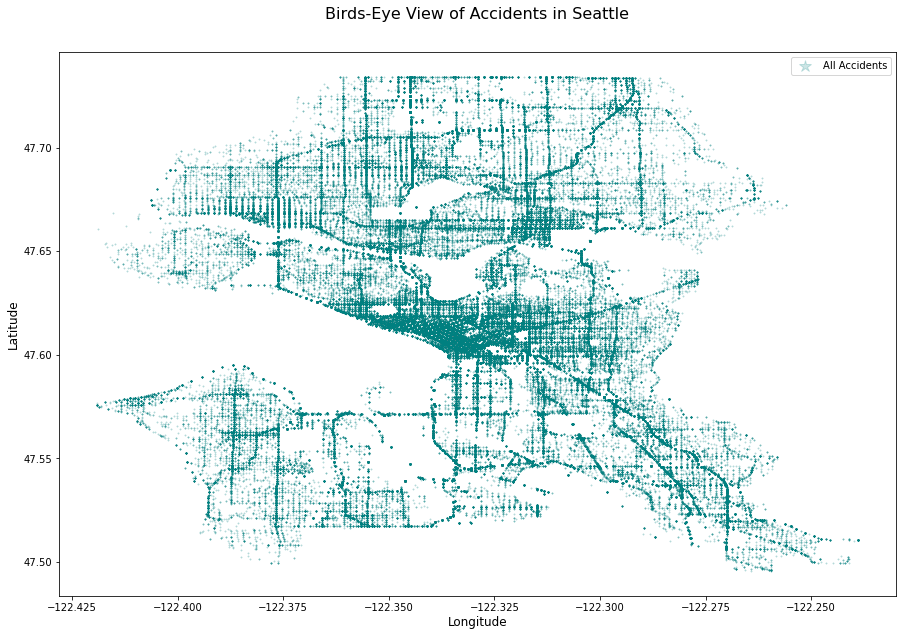

In [53]:
MAP_DATA = df[df['SEVERITYCODE']==2]

plt.figure(figsize=(15,10))

plt.plot( 'LONGITUDE', 'LATITUDE', data=df, linestyle='', marker='*', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Birds-Eye View of Accidents in Seattle', size=16, y=1.05)
plt.show()

From the above picture it can be observed that the density of accident spots is more in latitude range 47.60 to 47.65 and longitude range of -122.350 to -122.300.

## Exploratory Data Analysis

After analysing the relation between each input feature and target variable we are ready to develop our model. But before proceeding to that we need to make some changes in our data. Since most of our input features are categorical, we need to transform them in to numeric values. Most of the libraries which offers machine learning algorithm works on numeric data so, transforming it is an important step. 

Let’s explore datatypes of each attribute.


In [54]:
df.dtypes

SEVERITYCODE       int64
LONGITUDE        float64
LATITUDE         float64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
dtype: object

Before transforming the data, first we need to covert the object datatype to string.

In [55]:
# Converting the datatype from Object to String
df['LIGHTCOND'] = df['LIGHTCOND'].astype("string")
df['ROADCOND'] = df['ROADCOND'].astype("string")
df['WEATHER'] = df['WEATHER'].astype("string")
df['ADDRTYPE'] = df['ADDRTYPE'].astype("string")
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].astype("string")
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].astype("string")

In [56]:
df.dtypes

SEVERITYCODE       int64
LONGITUDE        float64
LATITUDE         float64
ADDRTYPE          string
COLLISIONTYPE     string
PERSONCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
WEATHER           string
ROADCOND          string
LIGHTCOND         string
HITPARKEDCAR      string
dtype: object

Now we are ready to transform the data. In this project we are using Label Encoder feature from Sklearn.preprocessing. The transformed data looks like in the figure given below. Also note that I have separated all the input features and gave it label ‘X’ from the target variable which is labelled ‘y’.

In [57]:
  #Encode "String" Labels into "Int" Labels for easy training
le = LabelEncoder()
df["LIGHTCOND"]=le.fit_transform(df["LIGHTCOND"])
df["WEATHER"]=le.fit_transform(df["WEATHER"])
df["ROADCOND"]=le.fit_transform(df["ROADCOND"])
df["ADDRTYPE"]=le.fit_transform(df["ADDRTYPE"])    
df["COLLISIONTYPE"]=le.fit_transform(df["COLLISIONTYPE"])
df["HITPARKEDCAR"]=le.fit_transform(df["HITPARKEDCAR"])

In [58]:
df.head()

SEVERITYCODE   LONGITUDE   LATITUDE  ADDRTYPE  COLLISIONTYPE  PERSONCOUNT  \
0             2 -122.323148  47.703140         1              0            2   
1             1 -122.347294  47.647172         0              9            2   
2             1 -122.334540  47.607871         0              5            4   
3             1 -122.334803  47.604803         0              4            3   
4             2 -122.306426  47.545739         1              0            2   

   VEHCOUNT                 INCDTTM  WEATHER  ROADCOND  LIGHTCOND  \
0         2    3/27/2013 2:54:00 PM        4         7          5   
1         2   12/20/2006 6:55:00 PM        6         7          2   
2         3  11/18/2004 10:20:00 AM        4         0          5   
3         3    3/29/2013 9:26:00 AM        1         0          5   
4         2    1/28/2004 8:04:00 AM        6         7          5   

   HITPARKEDCAR  
0             0  
1             0  
2             0  
3             0  
4             0

In [59]:
# X is input features

X=df[['LATITUDE','LONGITUDE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]
X

LATITUDE   LONGITUDE  ADDRTYPE  COLLISIONTYPE  PERSONCOUNT  VEHCOUNT  \
0       47.703140 -122.323148         1              0            2         2   
1       47.647172 -122.347294         0              9            2         2   
2       47.607871 -122.334540         0              5            4         3   
3       47.604803 -122.334803         0              4            3         3   
4       47.545739 -122.306426         1              0            2         2   
...           ...         ...       ...            ...          ...       ...   
184577  47.565408 -122.290826         0              2            3         2   
184578  47.690924 -122.344526         0              7            2         2   
184579  47.683047 -122.306689         1              3            3         2   
184580  47.678734 -122.355317         1              1            2         1   
184581  47.611017 -122.289360         0              7            2         2   

        WEATHER  ROADCOND  LIGHTCOND  HITPARKEDCAR  
0             4         7          5             0  
1             6         7          2             0  
2             4         0          5             0  
3             1         0          5             0  
4             6         7          5             0  
...         ...       ...        ...           ...  
184577        1         0          5             0  
184578        6         7          5             0  
184579        1         0          5             0  
184580        1         0          6             0  
184581        1         7          5             0  

[184582 rows x 10 columns]

In [60]:
y=df['SEVERITYCODE']

At last we will do normalization and standardization of the data. If the dataset contains the data of varied ranges it might affect the performance and accuracy of the model. Therefore, it is always best practice to do the normalization before fitting it into model. Here we are using StandardScaler().fit().transfrom() from Sklearn.

In [61]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.48739777,  0.24501881,  1.38540755, -1.60088434, -0.34423279,
         0.04747219,  0.80212158,  1.71821177,  0.57629845, -0.19415094],
       [ 0.49174574, -0.55927011, -0.72180926,  1.6151249 , -0.34423279,
         0.04747219,  1.78209098,  1.71821177, -1.54999725, -0.19415094],
       [-0.20740912, -0.13443019, -0.72180926,  0.18578746,  1.12835405,
         1.84491063,  0.80212158, -0.58893996,  0.57629845, -0.19415094],
       [-0.26199758, -0.1432006 , -0.72180926, -0.1715469 ,  0.39206063,
         1.84491063, -0.66783251, -0.58893996,  0.57629845, -0.19415094],
       [-1.31271947,  0.80202434,  1.38540755, -1.60088434, -0.34423279,
         0.04747219,  1.78209098,  1.71821177,  0.57629845, -0.19415094]])

**Splitting the dataset into training and testing data**

As a last step in our EDA, we are going to split our dataset into training and testing data. The purpose of any model is to predict the output for unknown input. If we use the whole dataset to train the model and then use the same data for accuracy evaluation (in-sample accuracy), that will not be the true test of our model. Out-of-Sample Accuracy is more crucial practically and it is evaluated using testing data.

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147665, 10) (147665,)
Test set: (36917, 10) (36917,)


## Model Development & Evaluation

At a fundamental level, there are two types of Supervised Machine Learning Algorithm.

•	Regression Model -Used to predict the continuous values. \
•	Classification Model - Used to predict the categorical values. 

**Reason: Since our target variable (SEVERITYCODE) is a categorical variable i.e. it has two values ‘1’ and ‘2’, our problem falls to the category of classification model. We are going to use two machine learning algorithms to predict the value of target variable.**
* Logistic Regression 
* Decision Tree Model \
Finally, we will find out-of-sample accuracy for both models using test data and compare the accuracy of both in the result section.

Logistic Regression:

Unlike Linear Regression which is used to predict the continuous value, Logistic regression is mainly used to handle classification problem.

Let’s create a logical regression object.


### Logistic Regression Model

In [63]:
# Fitting the model using Logistic Regression object, LR
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [64]:
# Predicting the target variable using Test Data
yhat = LR.predict(X_test)
yhat

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

predict_proba  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [65]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.47016722, 0.52983278],
       [0.78106286, 0.21893714],
       [0.74269633, 0.25730367],
       ...,
       [0.92957679, 0.07042321],
       [0.59542303, 0.40457697],
       [0.75388773, 0.24611227]])

In [66]:
print('Logistic Regression Jaccard Smimilarity Score is: ',jaccard_score(y_test, yhat))

Logistic Regression Jaccard Smimilarity Score is:  0.7008705052344105


In [67]:
# Creating a Confusion Matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

In [68]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.73      0.95      0.82     25828
           2       0.60      0.16      0.25     11089

    accuracy                           0.72     36917
   macro avg       0.66      0.56      0.54     36917
weighted avg       0.69      0.72      0.65     36917



In [69]:
# Calculating Log Loss
print('Logistic Regression Log Loss is: ',log_loss(y_test, yhat_prob))

Logistic Regression Log Loss is:  0.570318380953288


### Decision Tree Model

In [70]:
# Creating a Decision Tree Classifier Instance
severity = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
severity.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [71]:
# Predicting the target variable using Test Data
pred_severity = severity.predict(X_test)
pred_severity

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
# Evaluating the model using F1 Score and Jaccard Similarity Score
d=f1_score(y_test,pred_severity, average='weighted') 
print("F1 Score is: ",d)
print("DecisionTree's Jaccard Smilarity Score Score is: ", jaccard_score(y_test, pred_severity))

F1 Score is:  0.7201209036124941
DecisionTree's Jaccard Smilarity Score Score is:  0.7214827752348831


## Results and Discussion <a name="results"></a>

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set. In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

Another way of looking at accuracy of classifier is to look at confusion matrix. \
Based on the count of each section, we can calculate precision and recall of each label:

* Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP) \
* Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

So, we can calculate precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. \
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.\
And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case


With above accuracy, we are ready for prediction of severity of the accidents. This model can also help us in finding the key factors and situations that led to accidents. For example, we can find out answer to following crucial questions:
* Which areas in Seattle are more prone to severe collisions? \
* What road and light conditions are responsible for accidents? \
* Up to what extent weather can have impact on severity of crashes?

Answer to these questions will help the Transportation Department to take appropriate measures to counter act the underlying cause of crashes and minimize the human and property loss in the city. 

Although, we able to get high accuracy, we can further increase it by applying more complicated algorithms to develop the model but that requires advanced computation power. In addition to that, structuring the dataset with the help of someone who have more domain specific knowledge will give a great boost to the accuracy of model. Moreover, it will be cheery on the cake if the sources of the dataset will record and update the data frequently. Large percentage of missing values was a great hindrance in our project and its accuracy. Although, we handled it, it would be even better if the dataset is more accurate with its records.


## Conclusion <a name="conclusion"></a>

We developed the Logistic Regression and Decision Tree models for prediction by identifying the key input features depending on their relation with and impact on target variable. In this project we tried to solve the given problem using two classification models. It is now ready to be deployed and predict the severity of accidents provided the sufficient input. I hope that the Seattle Department of Transportation will get sufficient help from this project to overcome the problem of fatal crashes. This project was a step in the direction of keeping the citizens safe from accidents so that they can return to their homes safe and sound where their family is waiting for them.

## Thanks for reviewing my Notebook!

#### Author: Priyesh Saini